# Image Processing: 

In the images taken by [spitzer space telescope](http://www.spitzer.caltech.edu/), every pixel corresponds to a certain latitude and longitude on the Galactic coordinates. 
In the following image you can see every circle represents a star in a sample of study with a well defined Lat-Long value. 


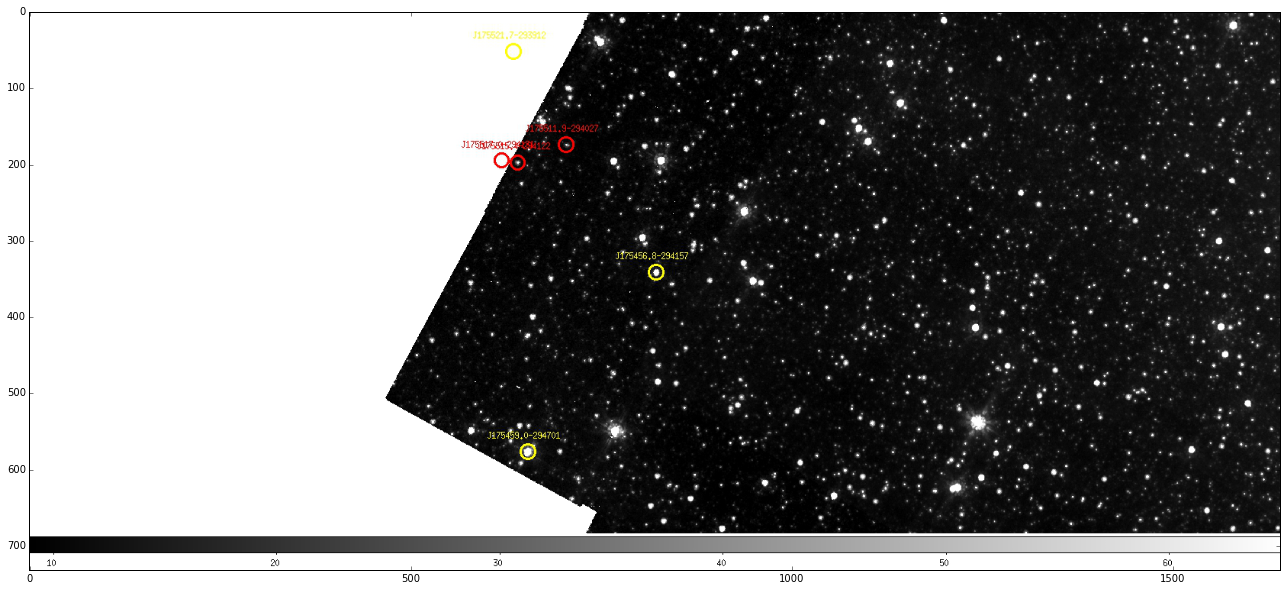

In [21]:
# This is a python code used to import an image and specify the size manually. 
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 

%matplotlib inline
pil_im = Image.open('./Desktop/PaperI/Source_Files/Figures/Ogle.jpg', 'r')
fig, ax = plt.subplots(figsize=(25, 10))
ax.imshow((pil_im))


Somtimes there are several images that cover various parts of the sky. Suppose you are choosing a sample of stars which are distributed in two different parts of the sky that are roughly close-by but parts of two or more several images. Now what you need is one single image that contains all of your sample stars. You need to pick different chunks of the sky and glue them together. 
Note that, it is incredibly important for this code to find the proper overalp regions between several images, scale them appropriately and glue them together to mark the sample of stars that we are interested to study. 

The following program is written in the *IDL* language (*Interactive Data Language*) and is designed to find overlap regions between two images, scale them (if needed), find the overlap region, glue them together and return one big image with accurate Lat-Long values for every pixel in the iamge: 

In [ ]:
PRO merge_field_images

dir = '/export/home/sanaz/data/Spitzer/Bulge/LowRes/Field_Images/'

; now for fieldname : c32

refimage = readfits(dir+'GLM_00050+0155_mosaic_I4_c32_pieceone.fits' , refhd)
oldimage =  readfits(dir+'GLM_35950+0155_mosaic_I4_c32_piecetwo.fits' , oldhd)

oldim_extra = fltarr(13280L, 9640)
oldim_extra[0:6639,*] = oldim

hastrom , oldimage , oldhd, newim, newhd , refhd, missing=0d0

checkwindow, 0
plotimage, hist_equal(refim,min=0,max=7000)
checkwindow, 1
plotimage, hist_equal(oldim,min=0,max=7000)
checkwindow, 2
plotimage, hist_equal(newim,min=0,max=7000)

; In this  case the ref image is located on the left hand side and the
; old image on the right hand side of the overlap region.

; Attempting to find the overlap region between two images 
done = 1
counter = 0
while done do begin
if total(newim[counter,*]) ne 0 then begin
min_limit = counter -1 
done = 0
print, counter
endif else begin
print, done
counter += 1
endelse 
endwhile 
max_limit = n_elements(newim[*,0])

overlap_range = [min_limit, max_limit]
overlap = (max_limit-min_limit)
row =  n_elements(refimage[0,*])
column = 2*fix(n_elements(refimage[*,0])) - (overlap)

xrange = long([5100,7500] )
yrange =  long([1000,2100])
row = (xrange[1]-xrange[0])+1
column = (yrange[1]-yrange[0])+1
combined_image = dblarr( column , row)

combined_image[0:min_limit,*] = refimage[0:min_limit,*]
combined_image[(max_limit):(column-1), *] = oldimage[(overlap):(max_limit-1), *]
; now we're gonna average the overlap region between the two ref and old images.

combined_image[(min_limit):(max_limit-1),*] = $
   (oldimage[0:(overlap-1),*] + refimage[(min_limit):(max_limit-1),*]) /2d0


com_header = [newhd] ;, refhd]
writefits , dir+ 'C32_Combined_Raw_Image.fits', combined_image , com_header

status = plot_field_targets(field='C32', header=com_header , $
                             image = combined_image ,dir=dir)

refimage =0
oldimage =0
com_header = 0
newim = 0
combined_image = 0

;---------------------------------------------------------------
; now for fieldname: OGle

;no need ! we have one piece image , yay!!
ogle_refim = readfits(dir+'GLM_00050-0220_mosaic_I3_ogle.fits' , oglerefhd)

status = plot_field_targets(field='Ogle', header=oglerefhd, image=ogle_refim ,dir=dir)
ogle_refim = 0

;---------------------------------------------------------------
now for fieldname: c35

refimage =  readfits(dir+'GLM_00050-0155_mosaic_I4_c35_pieceone.fits' , c35_refhd)
oldimage = readfits(dir+'GLM_35950-0155_mosaic_I4_c35_piecetwo.fits' , c35_oldhd)

hastrom , oldimage , c35_oldhd, c35_newim, c35_newhd , c35_refhd, missing = 0d0
 the ref image goes on the left and the old image goes on the right
 hand side of the overlap region.
c35done = 1
c35counter = 0
while c35done do begin
if total(c35_newim[c35counter,*]) ne 0 then begin
min_limit = c35counter -1 
c35done = 0
print, c35counter
endif else begin
print, c35done
c35counter += 1
endelse 
endwhile 
max_limit = n_elements(c35_newim[*,0])
overlap_range = [min_limit, max_limit]
overlap = (max_limit-min_limit)
row =  n_elements(refimage[0,*])
column = 2*fix(n_elements(refimage[*,0])) - (overlap)
combined_image = dblarr(column, row)

combined_image[0:min_limit,*] = refimage[0:min_limit,*]
combined_image[(max_limit):(column-1), *] = oldimage[(overlap):(max_limit-1), *]
 now we're gonna average the overlap region between the two
 ref and old images.
combined_image[(min_limit):(max_limit-1),*] = $
          (oldimage[0:(overlap-1),*] + refimage[(min_limit):(max_limit-1),*]) /2d0


c35_header = [c35_newhd] ; , c35_refhd]
writefits , dir+ 'C35_Combined_Raw_Image.fits', combined_image, c35_header
status = plot_field_targets(field='C35', header=c35_header, $
                                               image=combined_image,dir=dir)

;-------------------From Stephen Uttenthaler paper
tempim = readfits('/export/home/sanaz/data/Spitzer/Bulge/LowRes/Field_Images/Stephen_Uten_Field_Images/fig/bn1i4.fit' , hdr)

; this image particularly needs rotating!
HROT , tempim, hdr , newim, newhdr , 30 ,  -1 , -1, 0, MIS = 0

HEULER, newhdr, /Galactic  ;converting the header to Galactic coordinates

status = plot_field_targets(field='C35', header=newhdr, $
                            image= newim,dir=dir)

combined_image = 0
refimage = 0
oldimage = 0
c35_newim = 0

;---------------------------------------------------------------
;now for fieldname : NGC6522

refimage =  readfits(dir+'GLM_00150-0410_mosaic_I4_NGC_piecetwo.fits' , ngc_refhd)
oldimage = readfits(dir+'GLM_00050-0410_mosaic_I4_NGC_pieceone.fits' , ngc_oldhd)

hastrom , oldimage , ngc_oldhd, ngc_newim, ngc_newhd , ngc_refhd, missing = 0d0
; In this case the ref image is located on the left and the old image
; on the right hand side of the overlap region

ngcdone = 1
ngccounter = 0
while ngcdone do begin
if total(ngc_newim[ngccounter,*]) ne 0 then begin
min_limit = ngccounter -1 
ngcdone = 0
print, ngccounter
endif else begin
print, ngcdone
ngccounter += 1
endelse 
endwhile 
max_limit = n_elements(ngc_newim[*,0])

overlap_range = [min_limit, max_limit]
overlap = (max_limit-min_limit)
row =  n_elements(refimage[0,*])
column = 2*fix(n_elements(refimage[*,0])) - (overlap)
combined_image = dblarr(column, row)

combined_image[0:min_limit,*] = refimage[0:min_limit,*]
combined_image[(max_limit):(column-1), *] = oldimage[(overlap):(max_limit-1), *]

; now we're gonna average the overlap region between the two ref and old images.

combined_image[(min_limit):(max_limit-1),*] = $
          (oldimage[0:(overlap-1),*] + refimage[(min_limit):(max_limit-1),*]) /2d;

ngc_header = [ngc_newhd] ;, ngc_refhd]
writefits , dir+ 'NGC_Combined_Raw_Image.fits', combined_image , ngc_header

status = plot_field_targets(field='NGC', header=ngc_header, $
                            image= temporary(combined_image),dir=dir)


;-----------------------------------------
; This is from Stephen Uttenthaler paper
tempim = readfits('/export/home/sanaz/data/Spitzer/Bulge/LowRes/Field_Images/Stephen_Uten_Field_Images/fig/b6522i4.fit' , hdr)

; this image particularly needs rotating!
HROT , tempim, hdr , newim, newhdr , 30 ,  -1 , -1, 0, MIS = 0

HEULER, newhdr, /Galactic  ;converting the header to Galactic coordinates

status = plot_field_targets(field='NGC', header=newhdr, $
                            image= newim,dir=dir)

ngc_newim = 0
refimage = 0
oldimage = 0
combined_image = 0


END 

One the Images are glues together we obtain one image with accurate latitute and longitude for every pixel, now we can use the following program to plot the sample of stars onto this big image.
Note that a lot of our stars are in located on or near the overlap region between the two previously separated chunks of images. In some cases, these field images are taken with two different instruments mounted on different telescopes, so it is very cruicial for us to make sure they are all scaled to the same coordinates and represent the same thing otherwise we will be comparing apples and oranges! 

#### *The following code is also written in IDL language and the purpose of it is to plot the desired sample of stars on to the image of the field based on accurate lat-long on Galactic coordinates:*

In [ ]:
FUNCTION plot_field_targets,  field = field, header=header, image=image , dir=dir

objects = get_bulge_objects(/lowres,/all)
fieldnames = get_bulge_info(object=objects, /lowres, /fieldname)

case field of 
'C32' :begin
tarfind = where(fieldnames eq 'c32-a' OR fieldnames eq 'c32-b')
targets = objects[tarfind]
xrange = [5100,7500] 
yrange =  [1000,2100] 
min = 25
max = 45 
circle_size= 1
position = [-100, 110]
consra = [265.25,265.375, 265.5] ; dindgen(9)*0.1 +265
xright = [200,200,200]
consdec = [-28.50 ,-28.34 ] ; (-1)*(dindgen(10)*.1 +28)
raextent = [-.85 , -.54 , -.15 ]
decextent = [-.63 , -.23]
ra_orientation = 30
dec_orientation = -55
yright = [50,100]
yposra = [0.75, 0.7, 0.65]
yposdec = [0.41 , .40]
n_xticks = 5
n_yticks = 3
end
;----------------------------------------------
'Ogle' :begin
tarfind = where(fieldnames eq 'Ogle-a' OR fieldnames eq 'Ogle-b')
targets = objects[tarfind]
xrange = [3000,5500] 
yrange = [2800,3600] 
min = 4
max = 20
circle_size= 1
position = [-150, 100]
consra = [268.625 , 268.75] ;dindgen(11)*0.1 +267.9
consdec = [-29.67 , -29.84];(-1)*(dindgen(10)*.1 +29)
raextent = [-.865 ,-.68]
decextent = [-.33 , -0.71]
ra_orientation = 25
dec_orientation = -50
xright = [100,100]
yright = [50,100,100]
yposra = [.58 , 0.28]
yposdec = [0.85 ,0.85 ]
n_xticks = 5
n_yticks = 3
end
;----------------------------------------------
'NGC' :begin
tarfind = where(fieldnames eq 'NGC6522-a' OR fieldnames eq 'NGC6522-b' OR fieldnames eq 'NGC6522-c' )
targets = objects[tarfind]
xrange = [40,1100] 
yrange = [400,1300]  
min = 21
max = 26
circle_size= 1
position = [-50, 50]
consra = [270.75 , 270.96] ; dindgen(11)*0.2 +270
xright =  [100,100]
yright = [100,100,200]
consdec = [-29.84 , -30 , -30.18];(-1)*(dindgen(15)*.1 +29)
raextent = [-.15, -.2 ]
decextent = [-.27,-.7 , -.85]
yposra = [0.78 , 0.23]
yposdec = [0.95,0.94 , .25]
ra_orientation = 31
dec_orientation = -60
n_xticks = 5
n_yticks = 5
end
;----------------------------------------------
'C35' :begin
tarfind = where(fieldnames eq 'c35')
targets = objects[tarfind]
xrange = [10,1300] 
yrange = [400,1000] 
min = 30
max = 80
circle_size= 1
position = [-70,0]
consra = [267.25 , 267.5] ; dindgen(11)*0.15 +266.9
xright = [100,300]
yright = [100,200,300]
consdec = [-29.334 ,-29.5,-29.68] ;(-1)*(dindgen(15)*.15 +29)
raextent = [-.85 , -.3]
decextent = [-.18,-.55 ,-.77]
yposra = [0.75, 0.45]
yposdec = [0.9 ,0.88,0.5] ;,0.2]
ra_orientation = 29
dec_orientation = -59
n_xticks = 5
n_yticks = 3
end

endcase 

xs = (xrange[1] - xrange[0])/2d0
ys = (yrange[1] - yrange[0])/2d0


save_plotsettings
t = setup_device(/ps,/color , xsize= xs , ysize= ys )
device, filename = dir + strcompress(field+'_Merged_IDL.ps')
loadct , 0
!p.font = 0
device, /times 

;checkwindow, 1, xsize=xs ,ysize=ys
HEXTRACT, image, header, oldsubimage, oldsubhd, $
                  xrange[0],xrange[1], yrange[0], yrange[1]

header = 0 
image = 0
;subhd = header
;subimage = image
loadct, 0

HROTATE , oldsubimage, oldsubhd , subimage, subhd , 5

im_scaled = bytscl(subimage ,min= min , max=max) 

r = string(subhd, format='(A8)')
findpix = where(r eq 'PIXSCAL1',countpixscale)
if countpixscale ne 0 then begin
rr = strsplit(subhd[findpix],'=',/extract)
rrr = strsplit(rr[1],'/',/extract)
pixscale = float(rrr[0])
endif else begin
pixscale = 0.6d0
endelse 

findcr = where(r eq 'CRPIX1  ')
c = strsplit(subhd[findcr],'=',/extract)
cc = strsplit(c[1],'/',/extract)
colpixcr = float(cc[0])
findctr = where(r eq 'CRPIX2  ')
t = strsplit(subhd[findctr],'=',/extract)
tt = strsplit(t[1],'/',/extract)
rowpixcr = float(tt[0])

xyad , subhd , rowpixcr , colpixcr , longcr , latcr, /galactic
if longcr gt 100d0 then  longcr -= 360d0

n = (n_elements(im_scaled[*,0]))
xax = dindgen(n)*(pixscale/3600d0)+longcr
xaxisrange = xax - ((max(xax)-min(xax))/2)

v = (n_elements(im_scaled[0,*]))
yax = dindgen(v)*(pixscale/3600d0)+latcr
yaxisrange = yax - (max(yax)-min(yax))
finalxrange = float(string(minmax(xaxisrange),format='(F0.1)')) 
finalyrange = float(string(minmax(yaxisrange),format='(F0.1)')) 

plotimage, im_scaled , xticks = 1   , yticks=1 ,$
           ytickname = [' ',' '] , xtickname =[' ', ' ']

print, [latcr , longcr]
;---------------------------------------------------------
;----fixing the axes here --------------------------------
;---------------------------------------------------------
;----xaxis bottom
axis, xaxis = 0 , xticks = n_xticks-1 , xr=  minmax(finalxrange),$
       col=fsc_color('black') , xtitle = 'l [deg]'
;----xaxis top
axis, xaxis = 1 , xticks = n_xticks  , $
      xtickn = replicate([' '], n_xticks+1) ,$
      XTICKIN= tickinter, col=fsc_color('black') 
;----yaxis bottom
axis, yaxis = 0 , yticks = n_yticks-1  , yr = minmax(finalyrange),$
      col=fsc_color('black') , ytitle= 'b [deg]'
;----yaxis top
axis, yaxis = 1 , yticks = n_yticks  , ytickn = replicate([' '], n_yticks+1) ,$
 yTICKIN= tickinter, col=fsc_color('black') 
;---------------------------------------------------------
;---------------------------------------------------------

colpixels = dblarr(n_elements(targets))
rowpixels = dblarr(n_elements(targets))
latitude  = dblarr(n_elements(targets))
longitude = dblarr(n_elements(targets))
IDs       = strarr(n_elements(targets))

for loop=0,n_elements(targets)-1 do begin
count = tarfind[loop]
ID = get_bulge_info(object=objects[count],/lowres, /ID)
RA = get_bulge_info(object=objects[count], /lowres, /RA)
DEC = get_bulge_info(object=objects[count], /lowres, /DEC)
lat = get_bulge_info(object=objects[count], /lowres, /latitude)
long = get_bulge_info(object=objects[count], /lowres, /longitude)
RA_degree = ten(RA)*15d0
; we have to multiply by 15 because the out come of the program ten.pro is in hours
DEC_degree = ten(DEC)   ; this is already in degrees
print, ID+ 'Actual Latitude ' + string(lat)
print,  ID + 'Actual Longitude ' + string(long)

;glactc , ra_degree, dec_degree ,2000, gl ,gb , 1, /degree
ADXY , subhd ,  long  , lat , rowpix , colpix ;, /print
colpixels[loop] = colpix 
rowpixels[loop] = rowpix
latitude[loop] = lat
longitude[loop] = long
IDs[loop] = ID
endfor 



for n =0,n_elements(colpixels)-1 do begin
 
if total(IDs[n] eq ['NGC 6522-9','NGC 6522-19','Ogle-6','Ogle-1','c32-8','c32-10','c32-7']) eq 1 then begin
case IDs[n] of

'NGC 6522-19' : begin
 yy = -5
 xx = position[0]+40
end
'NGC 6522-9': begin
 yy = position[1] 
 xx = -10
csize = .7
end
'Ogle-1':begin
 yy =  -30
 xx =  -30
end
'Ogle-6': begin
 yy =  50
 xx = position[0]
end
'c32-7':begin
xx = -15
yy = 12
end
'c32-10': begin
 xx = -10
 yy = 10
end
'c32-8': begin
 xx = position[0]
 yy = -10
end
endcase
endif else begin
 yy = position[1] &  xx = position[0]
csize= circle_size 
endelse 
print, IDs[n] 
;print, xx , yy 
 
i = strsplit(IDs[n], '-', /extract)
ii = i[n_elements(i)-1]
legend, ii , box=0, pos= [rowpixels[n] +xx , colpixels[n]+yy ]   , $
                charsize=.9 ,col=fsc_color('yellow')
endfor 


PLOTSYM, 0 , csize  ,  THICK=3
print, csize 
oplot, rowpixels, colpixels , psym = 8 , col=fsc_color('yellow')
;oplot, latitude,longitude, psym = 8 , col=fsc_color('green'



;Now let's create the axes with proper range in lat-long units
; with proper size as well so that we can overplot the image on it.
 keywords = strtrim(strmid( subhd, 0, 8), 2)
find = where(keywords eq 'NAXIS1')
naxis1 = strsplit(subhd[find], ' ' ,/extract)
find = where(keywords eq 'NAXIS2')
naxis2 = strsplit(subhd[find], ' ' ,/extract)
;help, naxis1 , naxis2

xaxispix = dindgen(fix(naxis1[2]))
xyad , subhd,  xaxispix , dblarr(fix(naxis1[2])) , xvals , d 
find1 = where(xvals gt 300d0 , count1 )
if count1 ne 0 then xvals[find1] = xvals[find1] - 360d0
;print, xvals[find1]
find2 = where(xvals lt -300d0 , count2)
if count2 ne 0 then xvals[find2] = xvals[find2] + 360d0
yaxispix =  dindgen(fix(naxis2[2]))
xyad , subhd,  dblarr(fix(naxis1[2])) ,yaxispix , a , yvals 




; now finding the lines of constant right ascention and declination


HEULER, subhd, /CELESTIAL  ;converting the header to celestial coordinates

EXTAST , subhd , astr ; extracting the astrometry from header
loadct, 0


print_info = 0
for nn = 0,n_elements(consra)-1 do begin

raline = draw_constant_radec_lines(hd=subhd, consra=consra[nn],$
                                  astr=astr, /RA)

oplot, raline[*,0] , raline[*,1] , col=fsc_color('green') , line=2

; this is for cases where the line intersects the top horizontal axis.
findh = where(raline[*,1] lt n_elements(im_scaled[0,*]+xright[nn])  $
        AND raline[*,1] gt n_elements(im_scaled[0,*]-xright[nn]) , counth)
xaxispixnorm = xaxispix/max(xaxispix)
find2 = (raline[*,0])[mean(findh)] 

; this is for cases where the line intersects the top vertical axis.
findv = where(raline[*,0] lt n_elements(im_scaled[*,0])+xright[nn] AND raline[*,0] gt n_elements(im_scaled[*,0])-xright[nn])
find3 = (raline[*,0])[mean(findv)] 

if counth gt 0 then finalfind = find2 else finalfind = find3

nval = fix(n_elements(raline[*,0])/2d0)
slope  = mean((raline[0:(nval/2),1]-raline[(nval/2):nval,1]) / (raline[0:(nval/2),0]-raline[(nval/2):nval,0])) 
orient = (atan(slope)*360d0) / (2*!pi) ; in radians

if fix(finalfind) lt n_elements(xaxispixnorm) AND fix(finalfind) gt 0 then begin
xposra = xaxispixnorm[fix(finalfind)] + raextent[nn]

radec, (consra[nn]), 0, ihr, imin, xsec, ideg, imn, xsc

if xsec eq 0 then ra_info = strjoin(strcompress([string(ihr)+'h' ,string(imin)+'m'] )) else ra_info = strjoin(strcompress([string(ihr)+'h' ,string(imin)+'m' , string(fix(xsec))+'s'] ))

xyouts , xposra , yposra[nn] , ra_info  , $
         col=fsc_color('green') , /norm,charsize=1.1 ,$
         orientation = ra_orientation
print, xposra
print, ra_info
endif 
endfor 

for jj=0,n_elements(consdec)-1 do begin
decline = draw_constant_radec_lines(hd=subhd, consdec=consdec[jj],$
                                   astr=astr, /DEC)
oplot, decline[*,0] , decline[*,1] , col=fsc_color('green') , line=4


; this is for cases where the line intersects the top horizontal axis.
findh = where(decline[*,1] lt n_elements(im_scaled[0,*]+yright[jj])  $
        AND decline[*,1] gt n_elements(im_scaled[0,*]-yright[jj]) , counth)
xaxispixnorm = xaxispix/max(xaxispix)
find2 = (decline[*,0])[mean(findh)] 

; this is for cases where the line intersects the top vertical axis.
findv = where(decline[*,0] lt n_elements(im_scaled[*,0])+yright[jj] AND decline[*,0] gt n_elements(im_scaled[*,0])-yright[jj])
find3 = (decline[*,0])[mean(findv)] 


;find = where(decline[*,1] lt 20 AND decline[*,1] gt -20 , countfind)
;find2 = (decline[*,0])[mean(find)] 


xaxispixnorm = xaxispix/max(xaxispix)

slope  = mean((decline[0:500,1]-decline[500:1000,1]) / (decline[0:500,0]-decline[500:1000,0])) 
orient = (atan(slope)*360d0) /(2*!pi) ; in degree

if counth gt 0 then finalfind = find2 else finalfind = find3


if fix(finalfind) lt n_elements(xaxispixnorm) AND fix(finalfind) gt  200 AND fix(finalfind) gt 0 then begin

xposdec =   xaxispixnorm[fix(finalfind)] + decextent[jj]

radec, 0, (consdec[jj]), ihr, imin, xsec, ideg, imn, xsc

dec_info = strjoin(strcompress([string(ideg)+'d' , string(imn)+'m'] ))

xyouts , xposdec , yposdec[jj] , dec_info,col=fsc_color('green') ,$
          /norm,charsize=1.1 , orientation = dec_orientation 
print, yposdec[jj]
print, xposdec 
print, dec_info
endif  
endfor 

device, /close
set_plot ,'x'
xvals = 0
yvals = 0
subhd = 0
image = 0
im_scaled = 0
header = 0

END 


The following provide a sample output from these two code for fieldname Ogle because
the raw Ogle field image was shown in the very beginning. For more examples please check
out the published paper [here](http://mnras.oxfordjournals.org/search?submit=yes&submit=Search&pubdate_year=&volume=&firstpage=&doi=&author1=Golriz&author2=&title=&andorexacttitle=and&titleabstract=&andorexacttitleabs=and&fulltext=&andorexactfulltext=and&journalcode=mnras|mnrasl&fmonth=&fyear=&tmonth=&tyear=&flag=&format=standard&hits=10&sortspec=relevance&submit=yes). 

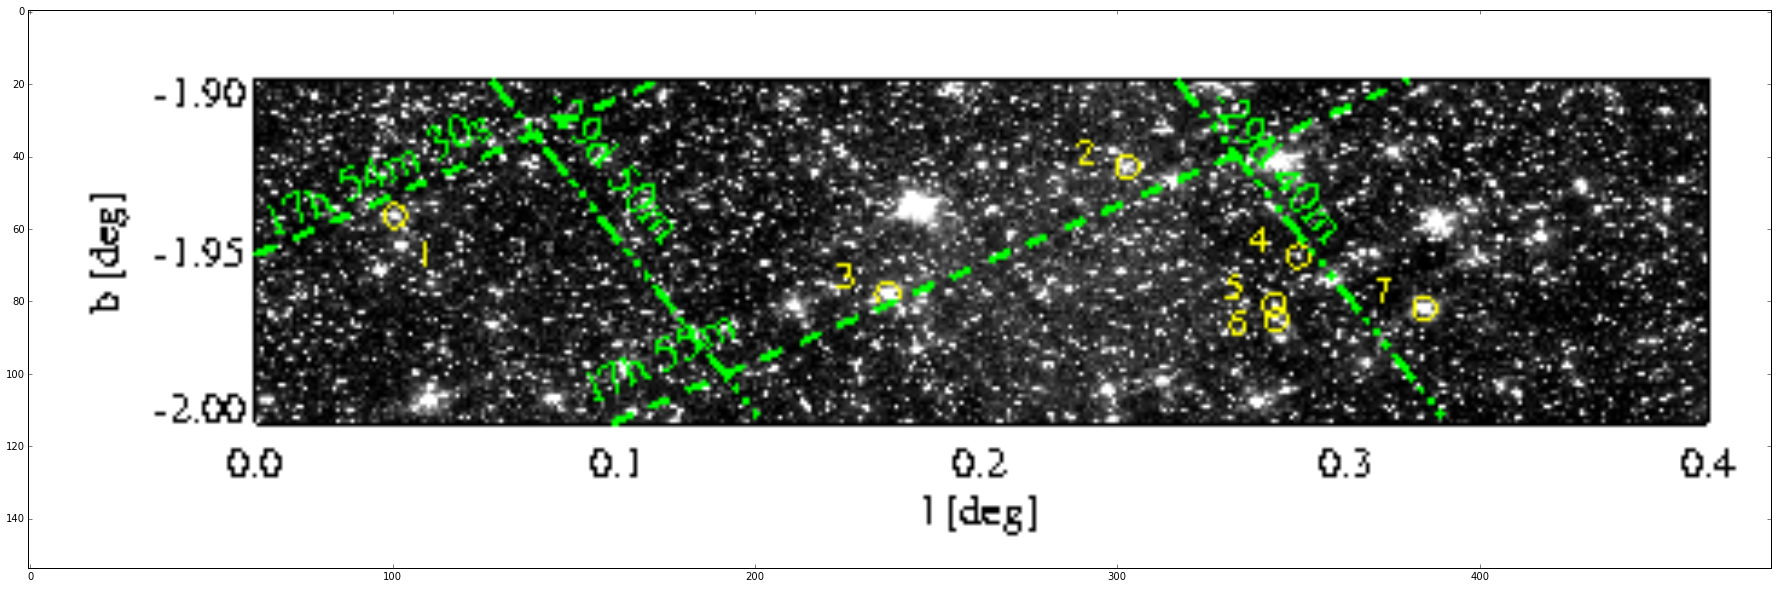

In [24]:
%matplotlib inline
pil_im = Image.open('./Desktop/PaperI/Source_Files/Figures/Ogle_Merged_IDL.ps', 'r')
fig, ax = plt.subplots(figsize=(40, 10))
ax.imshow((pil_im))

##### The Green Lines are lines of constant declination and right ascentions  for which the following code is used.

In [ ]:
FUNCTION  draw_constant_radec_lines , RA= RA , DEC=DEC ,  astr=astr ,$
                                    consra=consra , consdec=consdec, hd=hd

if keyword_set(RA) then want_RA = 1 else want_RA = 0
if keyword_set(DEC) then want_DEC = 1 else want_DEC = 0


if want_RA then begin
ny = (astr.naxis)[1]
center = (astr.crval)[1]
range = [center+2 , center-2]
step = (range[0]-range[1])/ny
declin = dindgen(ny)*step + range[1]  ;28 - 30

x = dblarr(n_elements(declin)) 
y = x
for loop1=0,n_elements(declin)-1 do begin
adxy , hd , consra , declin[loop1] , xpix, ypix
x[loop1] = xpix
y[loop1] = ypix
endfor 
endif 

if want_DEC then begin
nx = (astr.naxis)[0]
center = (astr.crval)[0]
range = [center-1 , center+1]
step = (range[1]-range[0])/nx
rascen = dindgen(nx)*step + range[0] 

x = dblarr(n_elements(rascen)) 
y = x 
for loop2=0,n_elements(rascen)-1 do begin
adxy , hd, rascen[loop2], consdec , xpix, ypix 
x[loop2] = xpix
y[loop2] = ypix
endfor 
endif 


line = [[x],[y]]

return, line 

END 
